In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('2019.csv')

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [10]:
df.isnull().any()

Overall rank                    False
Country or region               False
Score                           False
GDP per capita                  False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
dtype: bool

<AxesSubplot:xlabel='Country or region', ylabel='Overall rank'>

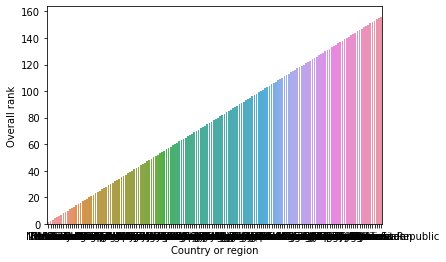

In [11]:
sns.barplot(x='Country or region',y='Overall rank',data=df)

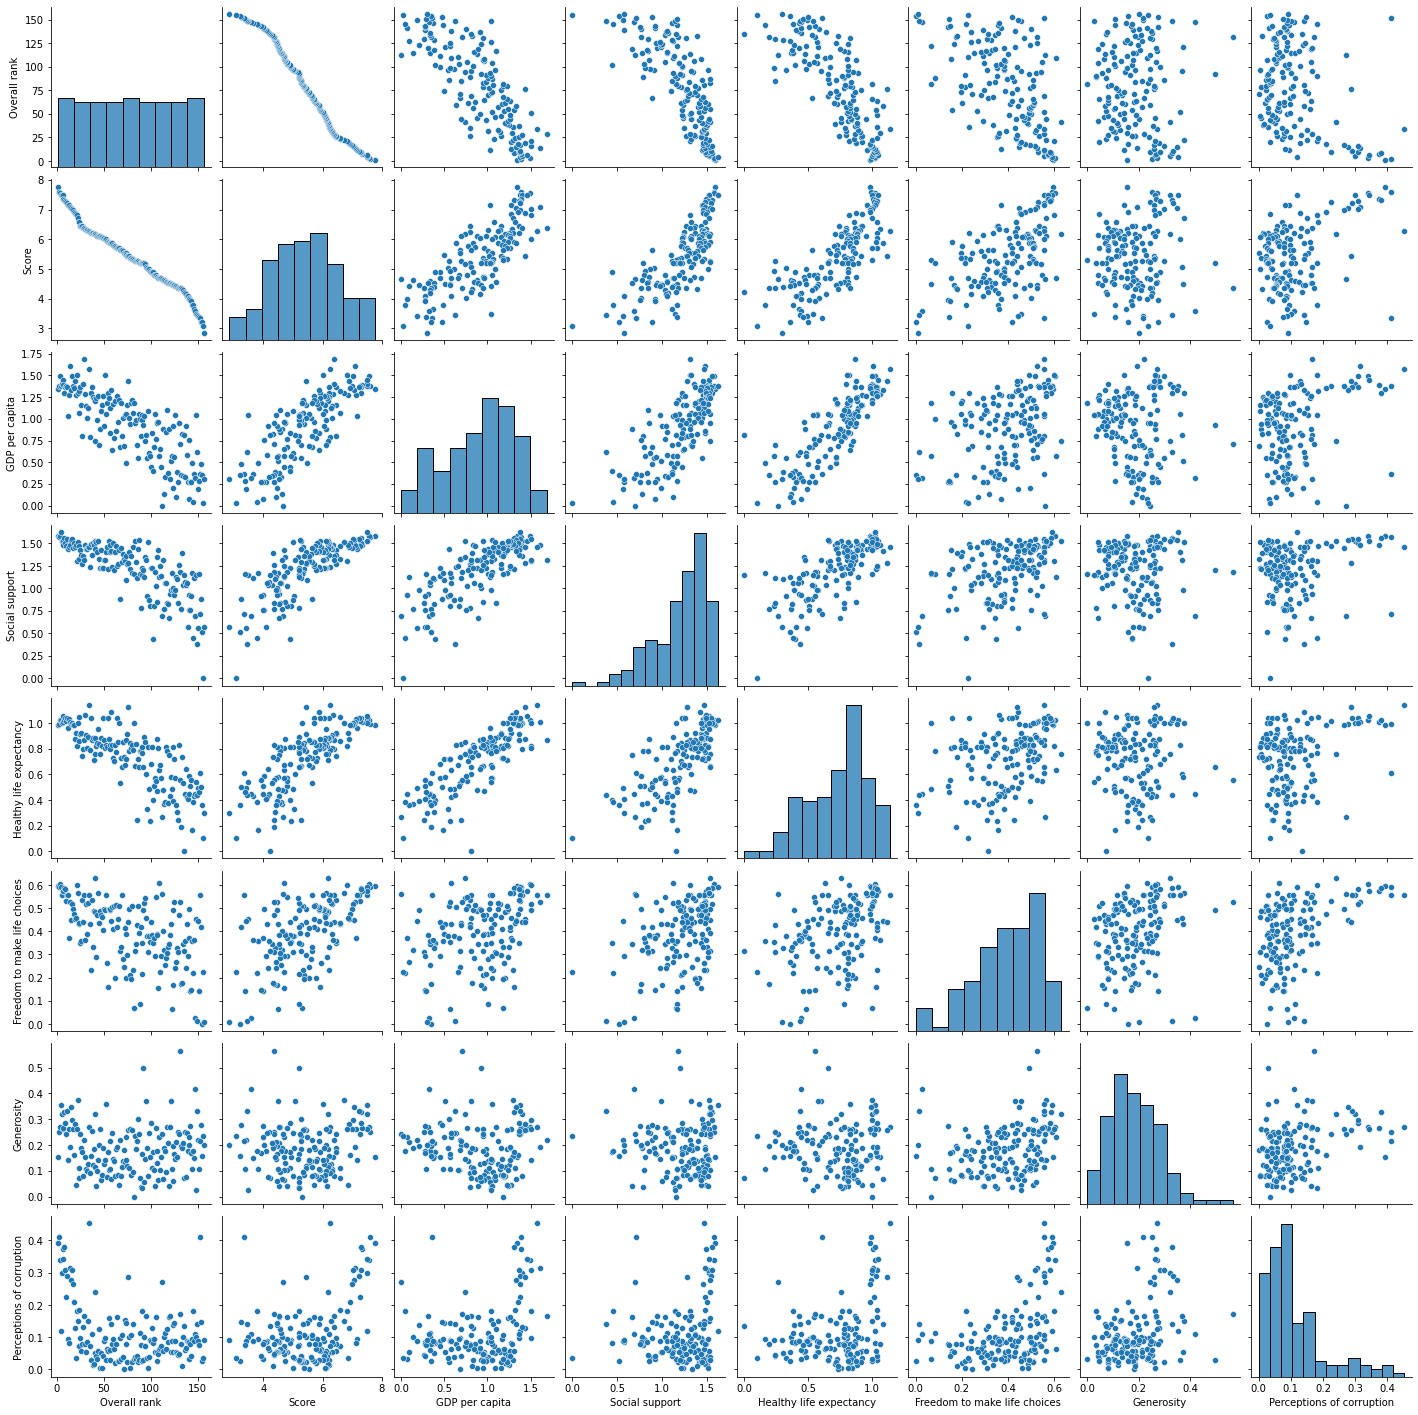

In [12]:
sns.pairplot(df)

In [14]:
tc = df.corr()
tc

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<AxesSubplot:>

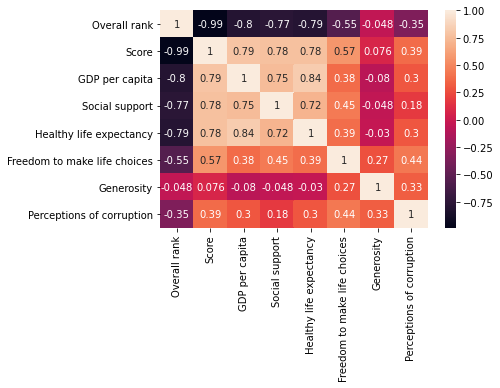

In [15]:
sns.heatmap(tc,annot = True)

In [16]:
l = df['Country or region']
d = df.drop(['Country or region'],axis= 1)

In [18]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(d)
print(standardised_data.shape)

(156, 8)


In [19]:
labels = l
data = d

In [20]:
from sklearn import decomposition

In [21]:
pca = decomposition.PCA()

In [23]:
pca.n_components = 2
sample_data = standardised_data
pca_data= pca.fit_transform(sample_data)
print(pca_data.shape)

(156, 2)


In [24]:
pca_data = np.vstack((pca_data.T,labels)).T
pca_data

array([[-4.1068344544884035, 1.1350204698954431, 'Finland'],
       [-4.141544866977293, 1.9267903612967217, 'Denmark'],
       [-4.162450451641759, 1.631699071020459, 'Norway'],
       [-3.5794961398325635, 0.9887545057967053, 'Iceland'],
       [-3.724924878787641, 1.7486822959470425, 'Netherlands'],
       [-3.9712263315147562, 1.5450334338665803, 'Switzerland'],
       [-3.790045482065672, 1.8355037306395598, 'Sweden'],
       [-3.8631823405046313, 2.3502890810296133, 'New Zealand'],
       [-3.678180681966156, 1.6122113997653902, 'Canada'],
       [-3.2831187703446902, 0.74874869728886, 'Austria'],
       [-3.620573236395997, 1.7578880288891376, 'Australia'],
       [-2.464025691576571, -0.4284941130119075, 'Costa Rica'],
       [-2.4591230394428094, -0.2960353692047766, 'Israel'],
       [-3.5892219014550513, 0.7634965572587062, 'Luxembourg'],
       [-3.152855414439961, 1.5860958387931252, 'United Kingdom'],
       [-3.512142467584997, 1.481445136437963, 'Ireland'],
       [-3.0

In [25]:
pca_df=pd.DataFrame(data = pca_data, columns=('1st_principal','2nd_principal','labels'))

In [26]:
import matplotlib.pyplot as plt

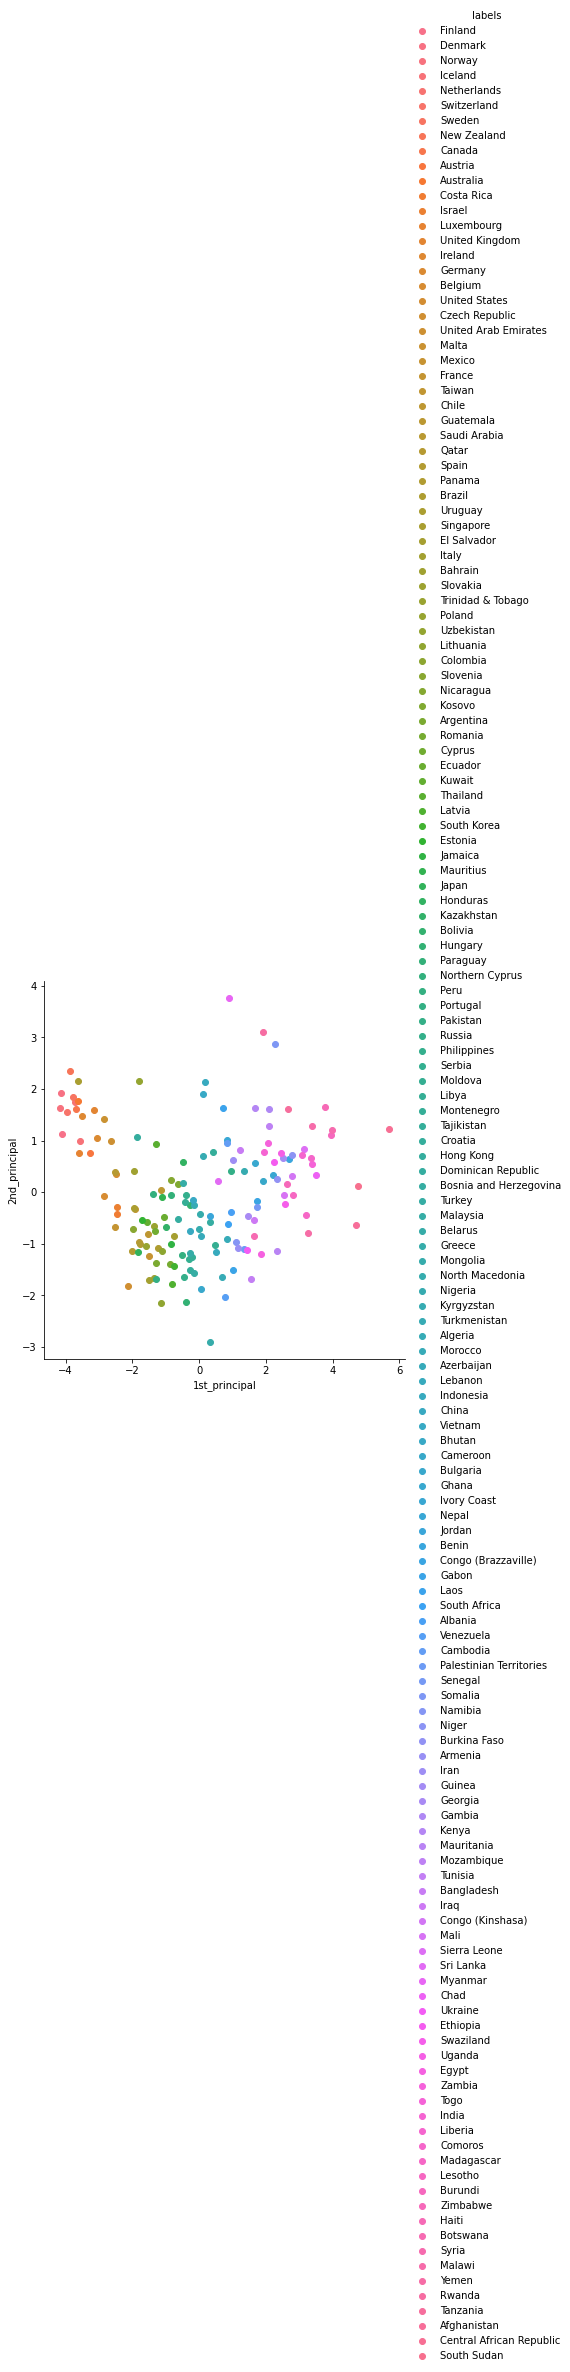

In [27]:
sns.FacetGrid(pca_df,hue='labels',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()